In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [2]:
SDB = sqlite3.connect('Auto.db')
C = SDB.cursor()
sql="""select * from Autopliuslt;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)
df = df_with_dubs.drop_duplicates()
SDB.close()

df.head()

,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,Ilgis,Aukstis,TechApžiuraIki,COemisijagkm,EuroStandartas,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai
0,A26894037,Peugeot,208,19 500,49 452 km,"1199 cm³, 131 AG (96kW)",Benzinas,Automatinė,Priekiniai,None,...,None,None,None,122 g/km,Euro 6,0 €,None,Klimato kontrolė,5,R17
1,A26868959,Volkswagen,Golf,5 950,250 000 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Visi varantys (4х4),None,...,None,None,2026-09,143 g/km,None,80.94 €,None,Klimato kontrolė,5,R18
2,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,None,None,None,~ 147 g/km,None,~ 40.47 €,None,Klimato kontrolė,5,None
3,A26868889,Ford,Focus,2 950,213 000 km,"1596 cm³, 101 AG (74kW)",Benzinas,Mechaninė,Priekiniai,None,...,None,None,2026-09,None,None,None,HPTHK...\n Rodyti,Klimato kontrolė,5,R16
4,A26888945,Porsche,Cayenne,5 850,259 000 km,"4500 cm³, 450 AG (331kW)",Benzinas,Automatinė,None,None,...,None,None,2025-05,~ 378 g/km,None,~ 364.23 €,None,None,None,None


In [4]:
def rida(x):
    if x != 'None':
        return int(x.replace(' ', '').replace('km', ''))
    else:
        return np.nan
        

def kaina(x):
    if x != 'None':
        return int(x.replace(' ', ''))
    else:
        return np.nan
    
    
df['price'] = df['Kaina'].apply(kaina)
df['rid'] = df['Rida'].apply(rida)
df.head()

,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,TechApžiuraIki,COemisijagkm,EuroStandartas,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai,price,rid
0,A26894037,Peugeot,208,19 500,49 452 km,"1199 cm³, 131 AG (96kW)",Benzinas,Automatinė,Priekiniai,None,...,None,122 g/km,Euro 6,0 €,None,Klimato kontrolė,5,R17,19500,49452.0
1,A26868959,Volkswagen,Golf,5 950,250 000 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Visi varantys (4х4),None,...,2026-09,143 g/km,None,80.94 €,None,Klimato kontrolė,5,R18,5950,250000.0
2,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,None,~ 147 g/km,None,~ 40.47 €,None,Klimato kontrolė,5,None,18000,199000.0
3,A26868889,Ford,Focus,2 950,213 000 km,"1596 cm³, 101 AG (74kW)",Benzinas,Mechaninė,Priekiniai,None,...,2026-09,None,None,None,HPTHK...\n Rodyti,Klimato kontrolė,5,R16,2950,213000.0
4,A26888945,Porsche,Cayenne,5 850,259 000 km,"4500 cm³, 450 AG (331kW)",Benzinas,Automatinė,None,None,...,2025-05,~ 378 g/km,None,~ 364.23 €,None,None,None,None,5850,259000.0


In [6]:
df['R5000'] = df[df['rid'] != 'None']['rid'].apply(lambda x: float(np.ceil(x/5000) * 5000))
df.head()

,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,COemisijagkm,EuroStandartas,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai,price,rid,R5000
0,A26894037,Peugeot,208,19 500,49 452 km,"1199 cm³, 131 AG (96kW)",Benzinas,Automatinė,Priekiniai,None,...,122 g/km,Euro 6,0 €,None,Klimato kontrolė,5,R17,19500,49452.0,50000.0
1,A26868959,Volkswagen,Golf,5 950,250 000 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Visi varantys (4х4),None,...,143 g/km,None,80.94 €,None,Klimato kontrolė,5,R18,5950,250000.0,250000.0
2,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,~ 147 g/km,None,~ 40.47 €,None,Klimato kontrolė,5,None,18000,199000.0,200000.0
3,A26868889,Ford,Focus,2 950,213 000 km,"1596 cm³, 101 AG (74kW)",Benzinas,Mechaninė,Priekiniai,None,...,None,None,None,HPTHK...\n Rodyti,Klimato kontrolė,5,R16,2950,213000.0,215000.0
4,A26888945,Porsche,Cayenne,5 850,259 000 km,"4500 cm³, 450 AG (331kW)",Benzinas,Automatinė,None,None,...,~ 378 g/km,None,~ 364.23 €,None,None,None,None,5850,259000.0,260000.0


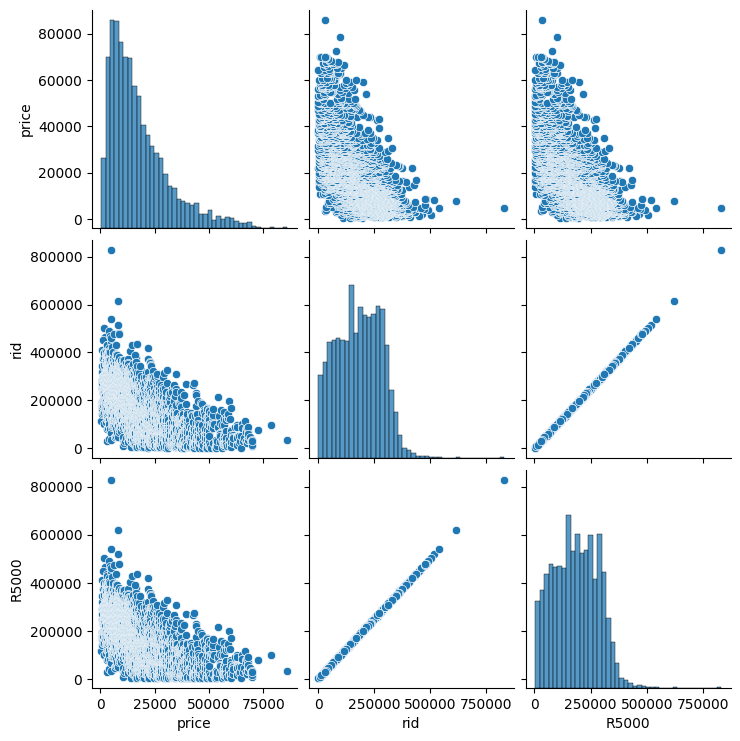

In [44]:
sns.pairplot(data=df)

In [18]:
rdf = df[['price', 'R5000']]
rdf.dropna(inplace=True)

rdf_gr = rdf.groupby('R5000').mean(numeric_only=True).reset_index()
rdf_gr.head()

,R5000,price
0,5000.0,37639.666667
1,10000.0,37456.184211
2,15000.0,38831.757576
3,20000.0,35153.000000
4,25000.0,33277.950000


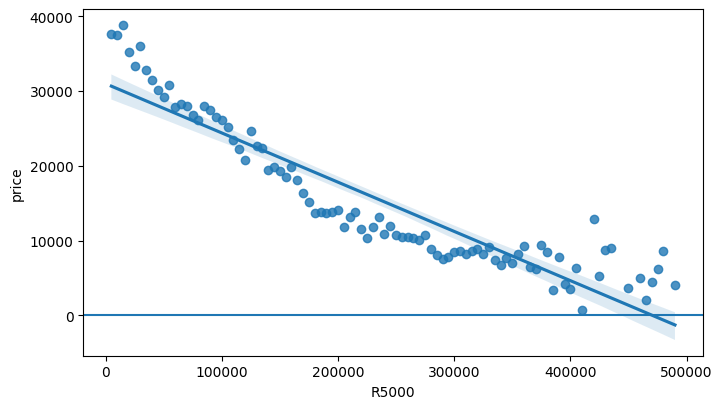

In [26]:
rdf2 = rdf_gr[rdf_gr['R5000'] < 500000]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=rdf2, x='R5000', y='price', order=1)
axis.axhline(y=0)
plt.show()

In [27]:
import numpy.polynomial.polynomial as poly

In [ ]:
coef = np.polyfit(x=rdf2['R5000'], y=rdf2['price'], deg=1) # grazina koeficientas is desines i kaire
print(coef)

[-6.58537763e-02  3.09800762e+04]


In [ ]:
fn_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

In [30]:
fn_fit

Polynomial([ 3.09800762e+04, -6.58537763e-02], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [31]:
r = 300000
t_kaina = fn_fit(r)
print(t_kaina)

11223.943285816891


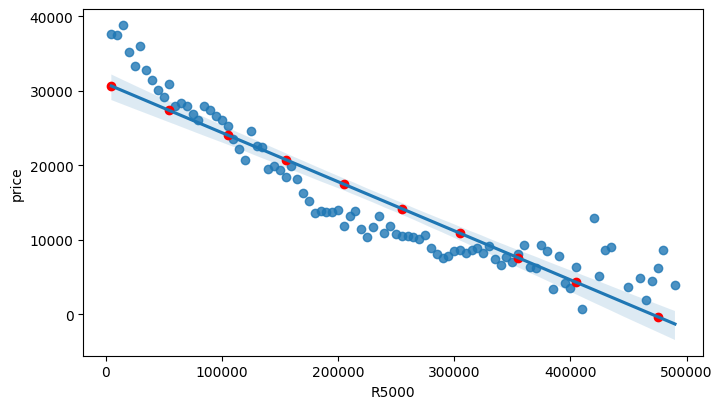

In [42]:
kainos_fitted = fn_fit(rdf2['R5000'])
rdf2['K_fit'] = kainos_fitted

fig, axis = plt.subplots(figsize=(8, 4.5))
axis = sns.regplot(data=rdf2, x='R5000', y='price', order=1)
axis.scatter(x=rdf2['R5000'][::10], y=rdf2['K_fit'][::10], c='red')

plt.show()

[-1.67950546e-13  3.08752277e-07 -1.79497741e-01  3.92771576e+04]


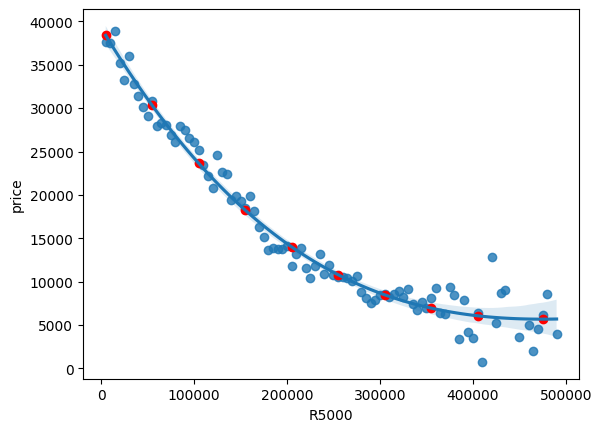

In [43]:
coef = np.polyfit(x=rdf2['R5000'], y=rdf2['price'], deg=3)
print(coef)
fn_fit = poly.Polynomial(coef[::-1])
kainos_fitted = fn_fit(rdf2['R5000'])
rdf2['K_fit'] = kainos_fitted

ax = sns.regplot(data=rdf2, x='R5000', y='price', order=3)
ax.scatter(x=rdf2['R5000'][::10], y=rdf2['K_fit'][::10], c='red')

plt.show()

In [ ]:
# VDV - Kaina, rida, amžius, variklio galia/tūris
# eletrinis - kaina, rida, amžius, baterijos talpa, atstumas

# Bendri parametrai - markė, modelis, mechaninė/automatinė, kėbulo tipas, kuras, varantieji ratai(2 ar 4x4)

# 1. Pasidaryti vienai markei ir pabandyti pritaikyti įvairius kriterijus

# Bendrieji parametrai nufiltruos dataframą
# surasti skaitinius parametrus kurie koreliuoja, tada jiems pritaikyti fn_fit funkcijas,
# surasti ir išvesti vidurkį.
